C:\Users\Fernando\AppData\Local\Temp\ipykernel_9664\2925329453.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_duplicatas['Installs'] = df_sem_duplicatas['Installs'].str.replace(',', '').str.replace('+', '')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_9664\2925329453.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_duplicatas['Installs'] = pd.to_numeric(df_sem_duplicatas['Installs'], errors='coerce')


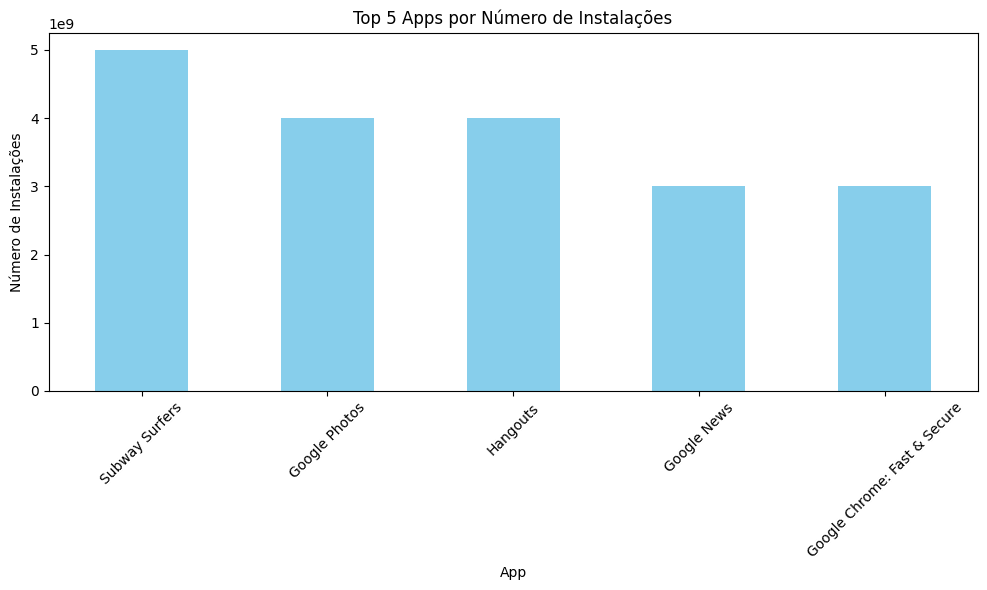

In [1]:
# Importa as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo CSV para um DataFrame do pandas
df = pd.read_csv('googleplaystore.csv')

# Remove as linhas duplicadas com base em todas as colunas
df_sem_duplicatas = df.drop_duplicates()

# Remove vírgulas e sinais de '+' da coluna 'Installs' e converte para tipo numérico
df_sem_duplicatas['Installs'] = df_sem_duplicatas['Installs'].str.replace(',', '').str.replace('+', '')
df_sem_duplicatas['Installs'] = pd.to_numeric(df_sem_duplicatas['Installs'], errors='coerce')

# Remove linhas com valores nulos na coluna 'Installs' após a conversão
df_installs_validos = df_sem_duplicatas.dropna(subset=['Installs'])

# Agrupa os dados por nome do app e soma as instalações (caso um app apareça mais de uma vez)
apps_instalacoes = df_installs_validos.groupby('App')['Installs'].sum()

# Ordena os apps por número de instalações em ordem decrescente e pega os 5 primeiros
top_5_apps = apps_instalacoes.sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
top_5_apps.plot(kind='bar', color='skyblue')
plt.title('Top 5 Apps por Número de Instalações')
plt.xlabel('App')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()